In [25]:
### DCF Model for AAPL 
# !pip install yfinance matplotlib pandas #

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the historical share price data
aapl = yf.Ticker("AAPL")
hist = aapl.history(period="5y")

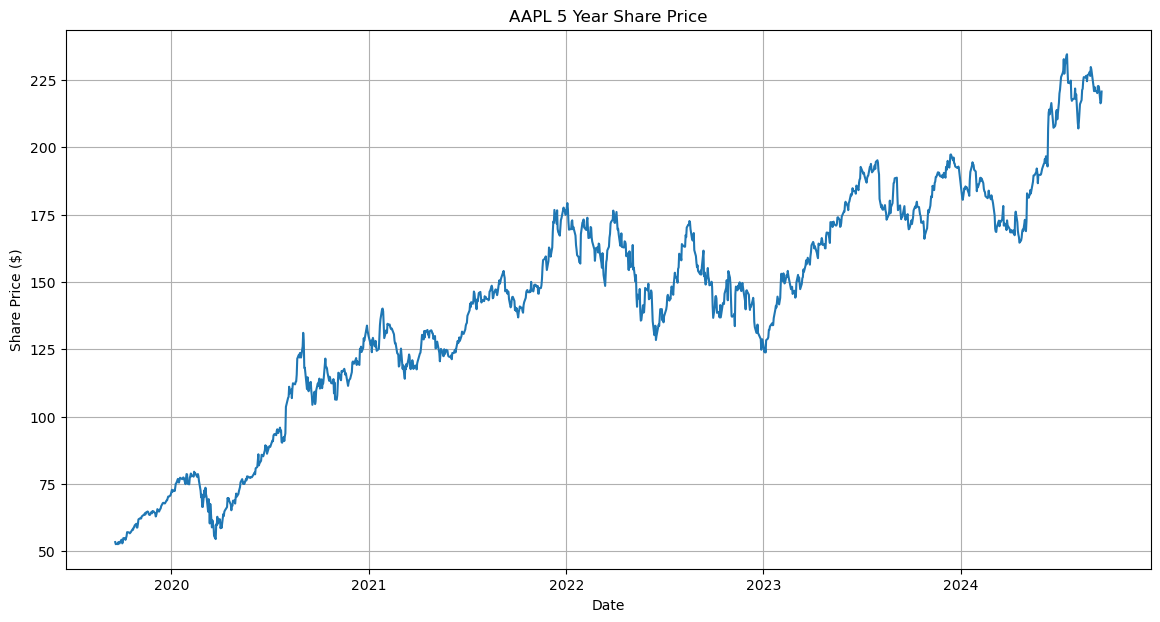

In [4]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Close'])
plt.title('AAPL 5 Year Share Price')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)
plt.show()

In [5]:
# Get the financial data
aapl = yf.Ticker("AAPL")

# Get cash flow information
cashflow = aapl.cashflow

# Get the Free Cash Flow (FCF)
FCF = cashflow.loc['Free Cash Flow'].mean()

In [24]:
# Estimate future FCF
growth_rate = [0.15] * 5 + [0.10] * 5  # assumed growth rates
years = 10  # number of years for the projection
future_FCF = np.array([FCF * (1 + growth_rate[i])**i for i in range(years)])

In [25]:
# Convert to billions
future_FCF_in_billions = future_FCF / 1e9

# Create a DataFrame
df = pd.DataFrame({
    'Year': np.arange(1, years + 1),
    'Growth Rate': growth_rate,
    'Future FCF (in billions)': future_FCF_in_billions
})

# Display the DataFrame
df

,Year,Growth Rate,Future FCF (in billions)
0,1,0.15,94.336250
1,2,0.15,108.486687
2,3,0.15,124.759691
3,4,0.15,143.473644
4,5,0.15,164.994691
5,6,0.10,151.929474
6,7,0.10,167.122421
7,8,0.10,183.834664
8,9,0.10,202.218130
9,10,0.10,222.439943


In [43]:
# Discount the future FCF to get the present value
discount_rate = 0.12  # assumed discount rate
present_value_FCF = sum(future_FCF / (1 + discount_rate)**np.arange(1, years+1))

In [63]:
# Calculate the terminal value
terminal_growth_rate = 0.09  # assumed terminal growth rate
terminal_value = future_FCF[-1] * (1 + terminal_growth_rate) / (discount_rate - terminal_growth_rate)

# Discount the terminal value to get its present value
present_value_terminal_value = terminal_value / (1 + discount_rate)**years

In [64]:
# Get the number of outstanding shares
outstanding_shares = aapl.info['sharesOutstanding']

# Calculate the intrinsic value of the stock
intrinsic_value_per_share = (present_value_FCF + present_value_terminal_value) / outstanding_shares

In [65]:
# Display the intrinsic value per share
print(f"The intrinsic value per share is: ${intrinsic_value_per_share:.2f}")

The intrinsic value per share is: $224.80


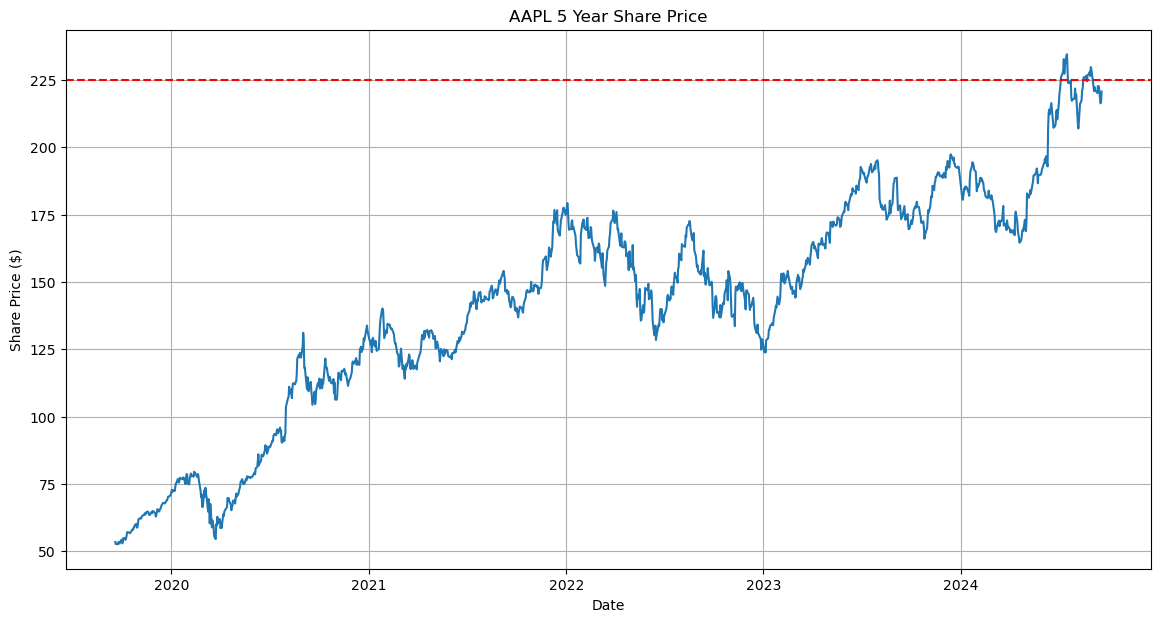

In [66]:
# Plot the data with the calculated intrinsic value
plt.figure(figsize=(14, 7))
plt.plot(hist.index, hist['Close'])
plt.axhline(y=intrinsic_value_per_share, color='r', linestyle='--')
plt.title('AAPL 5 Year Share Price')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.grid(True)
plt.show()